<a href="https://colab.research.google.com/github/Sushmakumar369/Assignments/blob/main/Titanic_dataset_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
titanic=pd.read_csv('/content/titanic_dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
# Making passenger id as index
titanic.set_index(['PassengerId'], inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Basic details of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [38]:
# Checking missing values
titanic. isna(). sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


<Axes: xlabel='Age', ylabel='Count'>

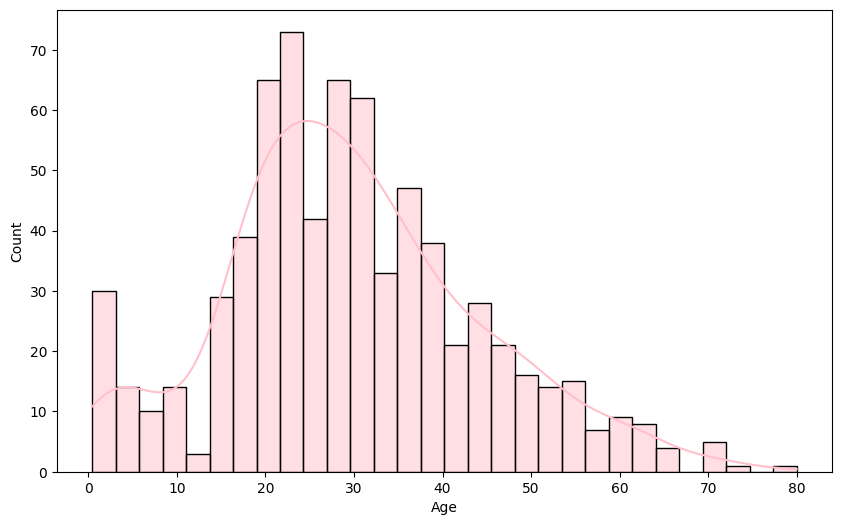

In [39]:
# Checking distribution type
plt. figure(figsize=(10, 6))
sns.histplot(titanic['Age'], kde=True, bins=30, color='Pink')

In [40]:
# Replacing missing values of age by mean
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic. isna(). sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [41]:
# Replacing missing values of Embarked by mode
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode())
titanic.isna(). sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [42]:
# Replacing missing values of Cabin by mode
titanic['Cabin']=titanic['Cabin'].fillna(titanic['Cabin'].mode())
titanic. isna(). sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,686


In [43]:
# MinMax Scaling on the feature set
x=titanic[['Pclass', 'Age','SibSp', 'Parch']]
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_scaled=sc.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled, columns=['Pclass', 'Age','SibSp', 'Parch'])
x_scaled

,Pclass,Age,SibSp,Parch
0,1.0,0.271174,0.125,0.000000
1,0.0,0.472229,0.125,0.000000
2,1.0,0.321438,0.000,0.000000
3,0.0,0.434531,0.125,0.000000
4,1.0,0.434531,0.000,0.000000
...,...,...,...,...
886,0.5,0.334004,0.000,0.000000
887,0.0,0.233476,0.000,0.000000
888,1.0,0.367921,0.125,0.333333
889,0.0,0.321438,0.000,0.000000


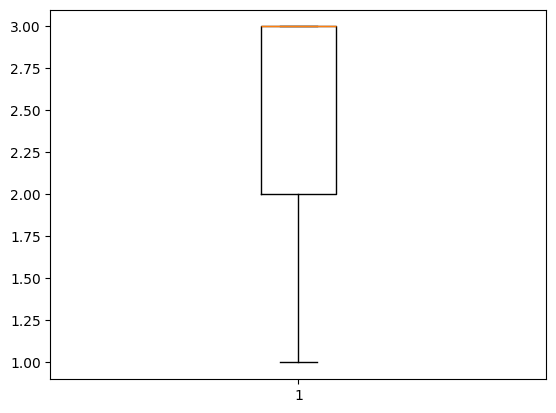

In [44]:
# Checking Outliers in Pclass
plt.boxplot(titanic['Pclass'])
plt.show()

There is no outlier in Pclass column

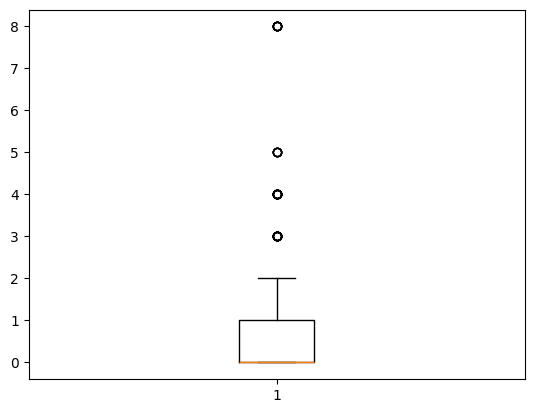

In [45]:
# Checking outliers in SibSp column
plt.boxplot(titanic['SibSp'])
plt.show()

In [46]:
# Handling outliers in SibSp column

Q1=np.percentile(titanic['SibSp'], 25)
Q1

0.0

In [47]:
Q3=np.percentile(titanic['SibSp'], 75)
Q3

1.0

In [48]:
IQR=Q3-Q1
IQR

1.0

In [49]:
Lower_limit=Q1-1.5*IQR
Lower_limit

-1.5

In [50]:
Upper_limit=Q3+1.5*IQR
Upper_limit

2.5

In [51]:
outlier=[]
for x in titanic['SibSp']:
  if x<Lower_limit or x>Upper_limit:
     outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

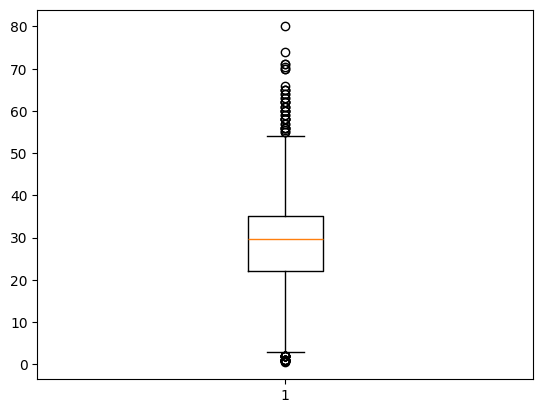

In [52]:
# Checking outliers in Age column
plt.boxplot(titanic['Age'])
plt.show()

In [53]:
# Handling outliers in Age column
Q1=np.percentile(titanic['Age'], 25)
Q1

22.0

In [54]:
Q3=np.percentile(titanic['Age'], 75)
Q3

35.0

In [55]:
IQR=Q3-Q1
IQR

13.0

In [56]:
Lower_limit=Q1-1.5*IQR
Lower_limit

2.5

In [57]:
Upper_limit=Q3+1.5*IQR
Upper_limit

54.5

In [58]:
outlier=[]
for x in titanic['Age']:
  if x<Lower_limit or x>Upper_limit:
     outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]